In [1]:
#loading the IMDB dataset 

from keras.datasets import imdb 

(train_data , train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
#argument num_words=10000 means you will keep the top 10000 most frequently occuring words in the training data 

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\admin\anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\admin\anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

In [2]:
# 0s stand for negative 1s for positive 
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
print(train_labels[0])

1


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
#word_index is a dict mapping words to integer index 
word_index= imdb.get_word_index()
#reverses int mapping integer indicies to words 
reverse_word_index=dict([(value , key) for (key ,value) in word_index.items()])
#decode the review .note that the indices are offset by 3 becouse 0,1 and 2 are reversed indices for "padding" "start of sequence" "unknown"
decode_reviews=''.join(
[reverse_word_index.get(i-3 , '?') for i in train_data[0]])

In [8]:
#encoding the integer sequence into a binary matrix 
import numpy as np 

def vectorize_sequences (sequences, dimension=10000) :
    #creates an all zero matrix of shape((len(sequences), dimension))
    results = np.zeros((len(sequences), dimension))
    for i ,sequence in enumerate (sequences) :
        #sets specific indices of results [i] to 1
        results[i , sequence] =  1.
        
    return results 

x_train =vectorize_sequences(train_data) #vectorize training data
x_test = vectorize_sequences (test_data) #vectorize test data
    

In [10]:
#vectorize the labels 
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [12]:
#model definition 

from keras import models 
from keras import layers 

model =models.Sequential()
model.add(layers.Dense(16 ,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16 , activation ='relu'))
model.add(layers.Dense(1 , activation ='sigmoid'))

In [13]:
#compiling the model 
model.compile(optimizer = 'rmsprop' , loss= 'binary_crossentropy' ,metrics=['accuracy'])

In [14]:
#using cuctom losses and metrics 

from keras import losses 
from keras import metrics
model.compile (optimizer='rmsprop' , loss=losses.binary_crossentropy ,  metrics=[metrics.binary_accuracy])

In [15]:
#seting aside a validation set 
x_val=x_train[:10000]
partial_x_train =x_train[10000:]

y_val=y_train[:10000]
partial_y_train =y_train[10000:]

In [16]:
model.compile(optimizer = 'rmsprop' , loss= 'binary_crossentropy' ,metrics=['accuracy'])

In [17]:
#train the model 
history=model.fit(partial_x_train,partial_y_train ,epochs=20 , batch_size =512 ,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 93s 859ms/step - loss: 0.5915 - accuracy: 0.7042 - val_loss: 0.3901 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3255 - accuracy: 0.9018 - val_loss: 0.3071 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2286 - accuracy: 0.9312 - val_loss: 0.2824 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1778 - accuracy: 0.9450 - val_loss: 0.2978 - val_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1412 - accuracy: 0.9569 - val_loss: 0.3096 - val_accuracy: 0.8781
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1118 - accuracy: 0.9691 - val_loss: 0.2923 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0884 - accuracy: 0.9767 - val_loss: 0.3095 - val_accuracy: 0.8838
Epoch 8/20


In [18]:
history_dict = history.history

In [19]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

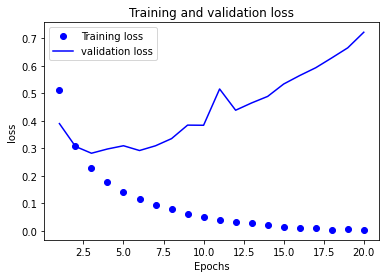

In [20]:
#ploting the training and validation loss 
import matplotlib.pyplot as plt 
history_dict = history.history 
acc=history_dict['accuracy']
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1 ,len(acc)+1)

plt.plot(epochs , loss_values , 'bo' ,  label='Training loss') #'bo' for blue dot.
plt.plot(epochs , val_loss_values , 'b' , label ="validation loss" ) # 'b' for solid blue line 
plt.title ("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend()
plt.show ()

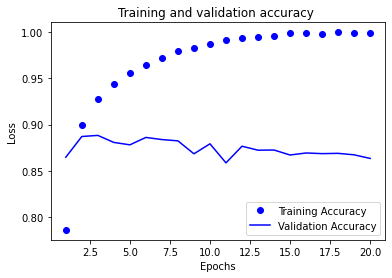

In [22]:
#ploting the training and validation accuracy
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs,acc_values, 'bo' ,label="Training Accuracy")
plt.plot(epochs,val_acc_values, 'b' ,label="Validation Accuracy")
plt.title("Training and validation accuracy ")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()